<a href="https://colab.research.google.com/github/eduardova2892/FinanzasEduPub/blob/main/Colab_Finanzas200825.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== Resumen de Gastos ===
Alimentos                   31
Alimentos No Necesarios    305
Alcohol y Salidas          433
Comidas corporativas       130
dtype: int64

💰 Gasto total: S/. 899.00


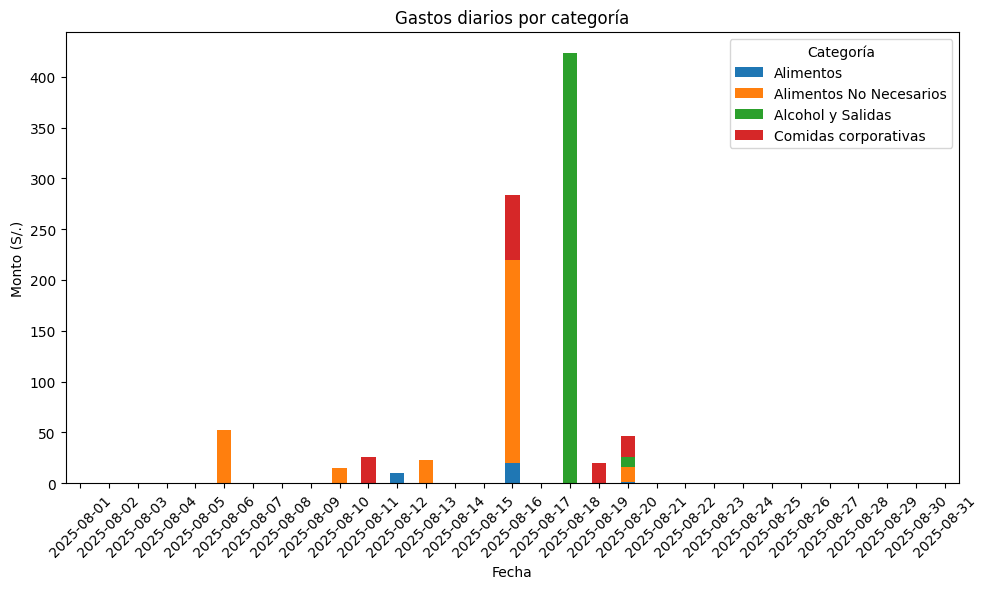

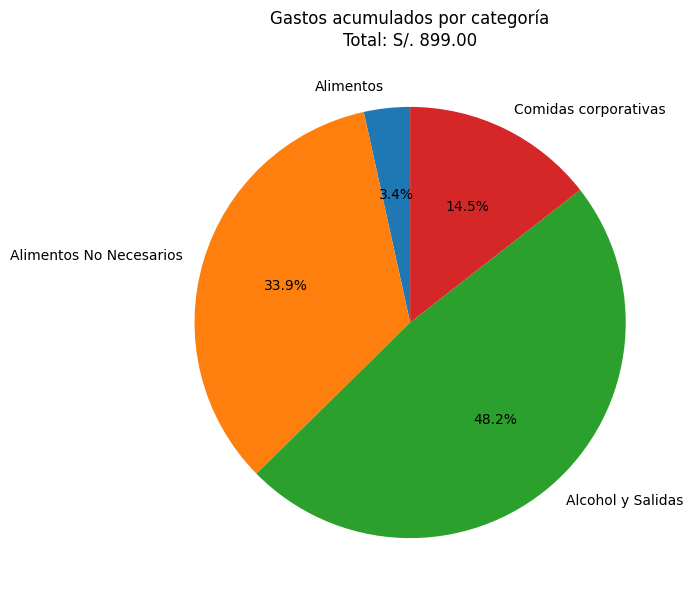

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Nombre del archivo Excel
archivo = "Gastos_20082025.xlsx"

# Leer el archivo
df = pd.read_excel(archivo)

# Asegurar que la columna Fecha esté en formato correcto
df["Fecha"] = pd.to_datetime(df["Fecha"])

# --- Resumen general por categoría ---
def mostrar_resumen():
    # Sumar todas las columnas (excepto Fecha)
    resumen = df.drop(columns=["Fecha"]).sum()
    total = resumen.sum()

    print("\n=== Resumen de Gastos ===")
    print(resumen)
    print(f"\n💰 Gasto total: S/. {total:.2f}")

# --- Gráfico por día y categoría (barras apiladas) ---
def mostrar_grafico_diario():
    df_dias = df.copy()
    df_dias["Fecha"] = df_dias["Fecha"].dt.date
    df_dias.set_index("Fecha", inplace=True)

    df_dias.plot(kind="bar", stacked=True, figsize=(10,6))
    plt.title("Gastos diarios por categoría")
    plt.xlabel("Fecha")
    plt.ylabel("Monto (S/.)")
    plt.xticks(rotation=45)
    plt.legend(title="Categoría")
    plt.tight_layout()
    plt.show()

# --- Gráfico de pie acumulado mensual ---
def mostrar_grafico_pie():
    # Agrupar por mes
    df_mes = df.copy()
    df_mes["Mes"] = df_mes["Fecha"].dt.to_period("M")

    # Sumar por categoría en todo el período
    resumen_mensual = df_mes.drop(columns=["Fecha", "Mes"]).sum()
    total = resumen_mensual.sum()

    plt.figure(figsize=(7,7))
    plt.pie(
        resumen_mensual,
        labels=resumen_mensual.index,
        autopct="%1.1f%%",
        startangle=90
    )
    plt.title(f"Gastos acumulados por categoría\nTotal: S/. {total:.2f}")
    plt.show()

# --- Ejecución ---
if __name__ == "__main__":
    mostrar_resumen()
    mostrar_grafico_diario()
    mostrar_grafico_pie()
